<a href="https://colab.research.google.com/github/monifonse/Deber/blob/main/MilkProduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sn

In [72]:
ruta_archivo = '/content/MilkProduction.csv'

In [73]:
df = pd.read_csv('/content/MilkProduction.csv')

In [75]:
print(df)

        Date  Production
0    1962-01         589
1    1962-02         561
2    1962-03         640
3    1962-04         656
4    1962-05         727
..       ...         ...
163  1975-08         858
164  1975-09         817
165  1975-10         827
166  1975-11         797
167  1975-12         843

[168 rows x 2 columns]


In [76]:
dt_ind = pd.read_csv('/content/MilkProduction.csv', parse_dates=['Date'], index_col='Date')

In [77]:
dt = dt_ind.copy()
dt.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


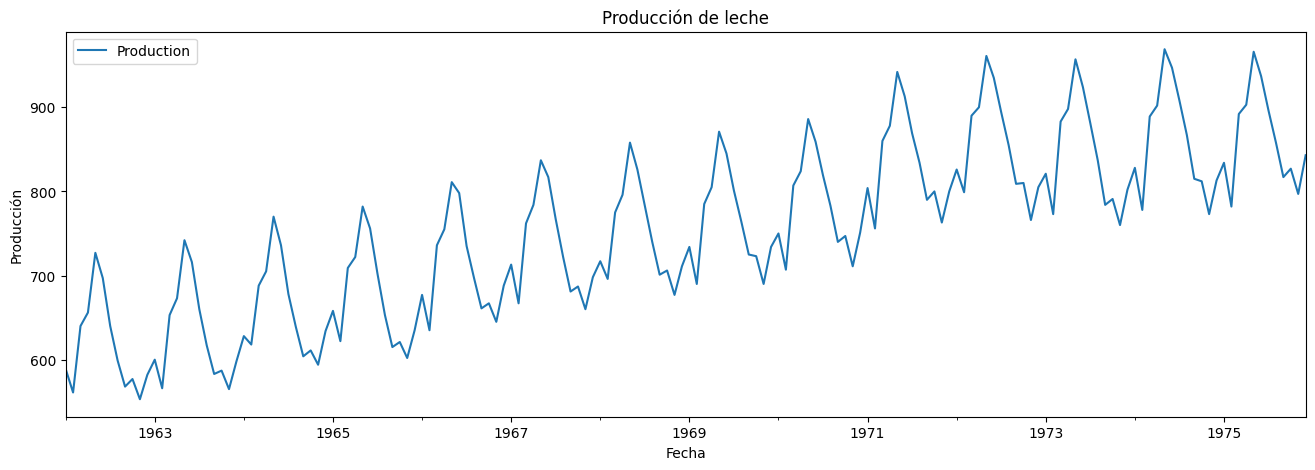

In [82]:
ax = dt.plot(figsize=(16,5), title='Producción de leche');
ax.set_xlabel("Fecha");
ax.set_ylabel("Producción");

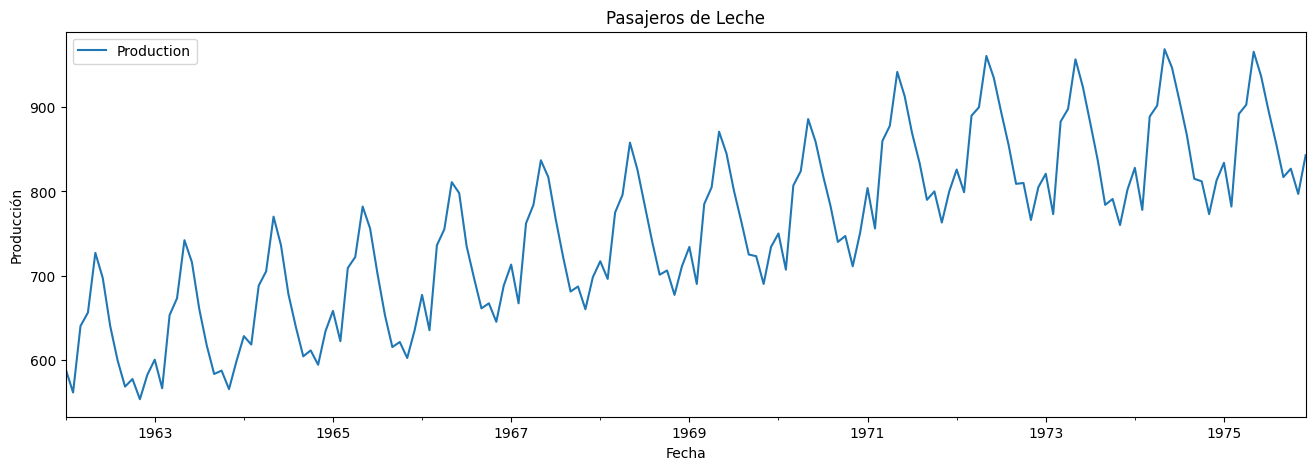

In [79]:
START_YEAR = 1962
END_YEAR = 1975

dt_zoom = dt[(dt.index.year >= START_YEAR) & (dt.index.year <= END_YEAR)]

ax = dt_zoom.plot(figsize=(16,5), title='Pasajeros de Leche');
ax.set_xlabel("Fecha");
ax.set_ylabel("Producción");

DESCOMPONIENDO UNA SERIE TEMPORAL

In [83]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

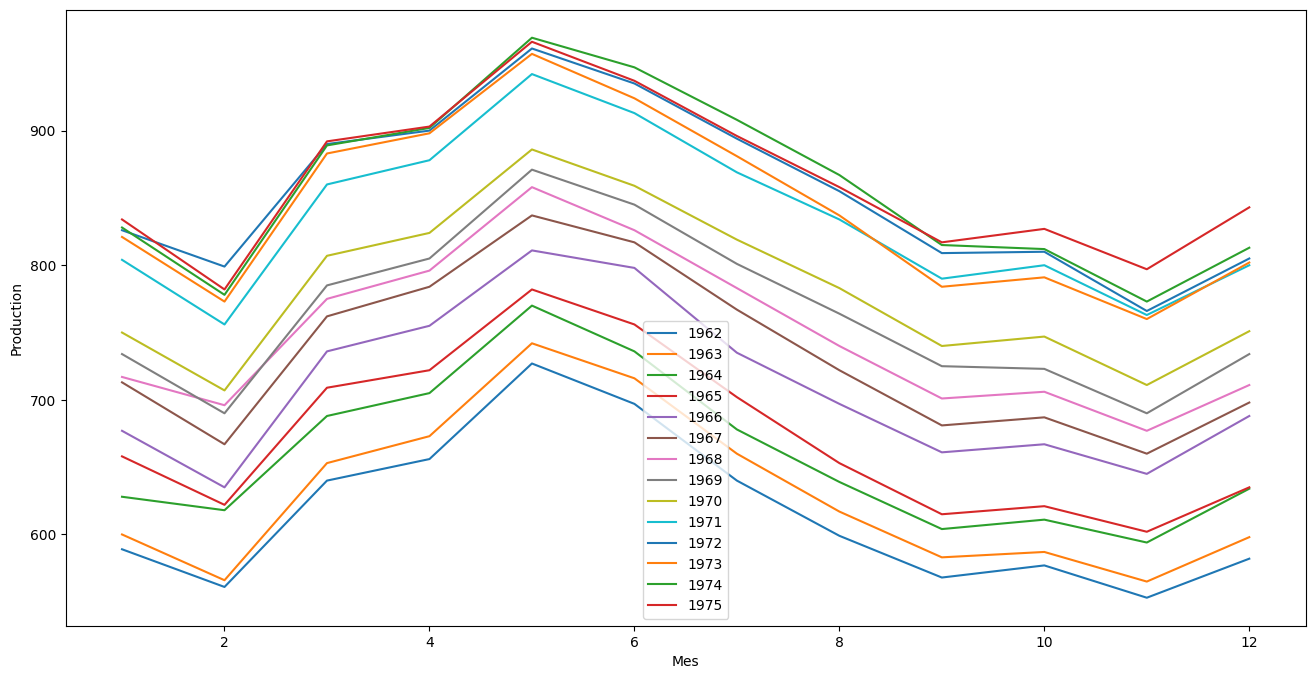

In [84]:
dt_agg = dt.copy()
dt_agg['year'] = dt.index.year
dt_agg['month'] = dt.index.month
dt_pivot = pd.pivot_table(dt_agg, values='Production', index='month', columns='year', aggfunc='mean')
dt_pivot.plot(figsize=(16,8))
plt.legend()
plt.xlabel('Mes')
plt.ylabel('Production')
plt.show()

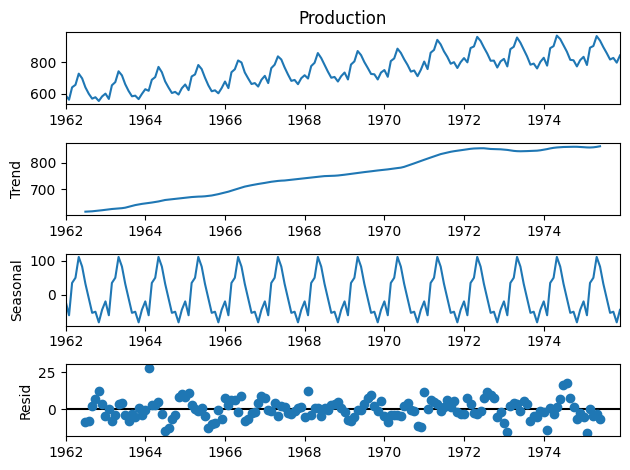

In [91]:
additive = seasonal_decompose(dt['Production'], model='additive', period=12)
additive.plot()
plt.show();

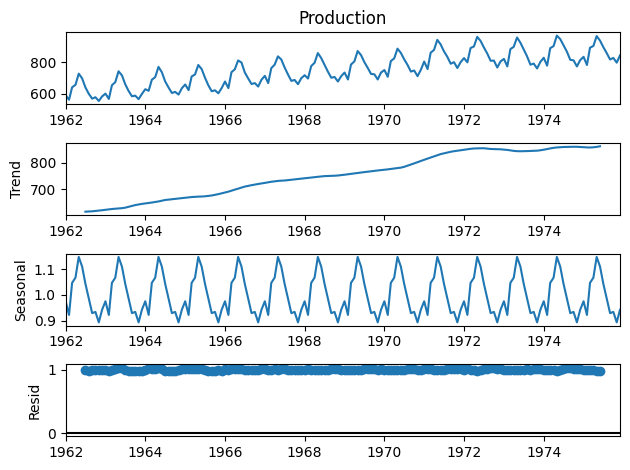

In [92]:
multiplicative = seasonal_decompose(dt['Production'], model='multiplicative', period=12)
multiplicative.plot();
plt.show();

In [93]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf, pacf

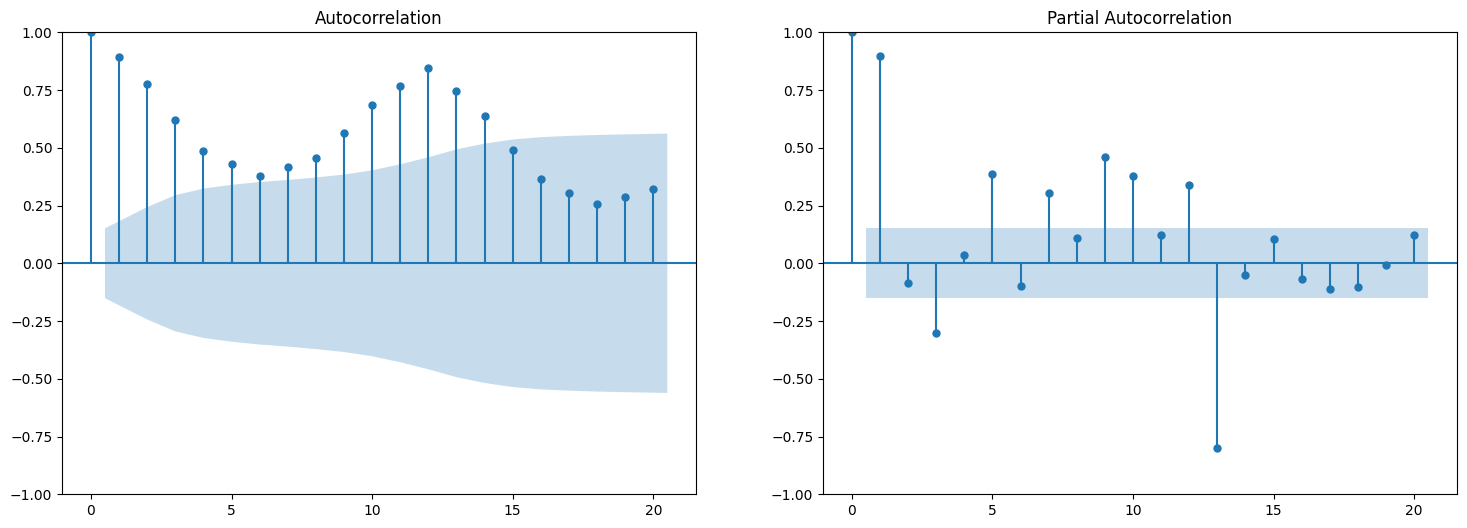

In [94]:
fig, ax = plt.subplots(1,2,figsize=(18,6))
plot_acf(dt, lags=20, ax=ax[0])
plot_pacf(dt, lags=20, ax=ax[1])
plt.show()

In [95]:
acf_coef = acf(dt)
print(acf_coef)

[1.         0.89157378 0.77817897 0.62027149 0.48666361 0.4281481
 0.37606367 0.41477252 0.45425153 0.56181499 0.68655906 0.76855255
 0.84491352 0.74498717 0.63766681 0.4896786  0.36355484 0.30594908
 0.25490794 0.28742069 0.32056924 0.41651576 0.52871253]


In [97]:
pacf_coef = pacf(dt)
print(pacf_coef)

[ 1.          0.89691254 -0.08641102 -0.30065408  0.03704353  0.38861552
 -0.09669472  0.30386494  0.10921593  0.46009995  0.37723165  0.1203746
  0.33930438 -0.79801803 -0.05104606  0.10633953 -0.06695209 -0.10974449
 -0.10405258 -0.00580825  0.12201984  0.11313973  0.1028468 ]


SMOOTIN AVERAGE

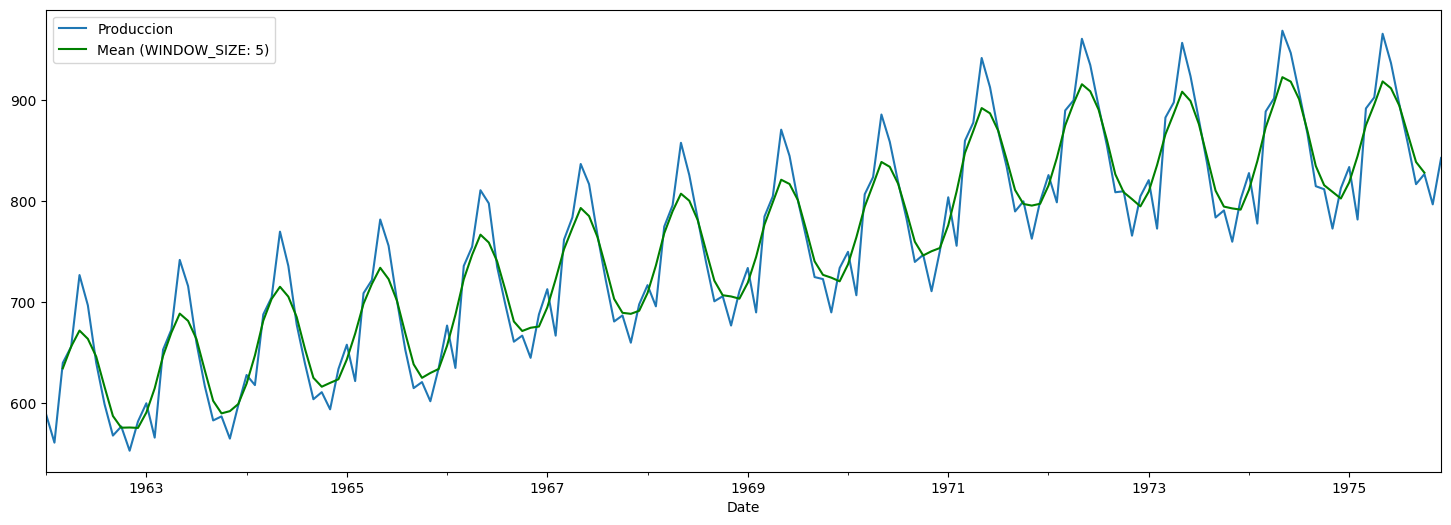

In [99]:
WINDOW_SIZE = 5

r = dt.rolling(window = WINDOW_SIZE, center=True)

figure(figsize=(18, 6))
dt['Production'].plot(label='Produccion')
r.mean()['Production'].plot(label='Mean (WINDOW_SIZE: '+str(WINDOW_SIZE) + ')', color='green');
plt.legend();

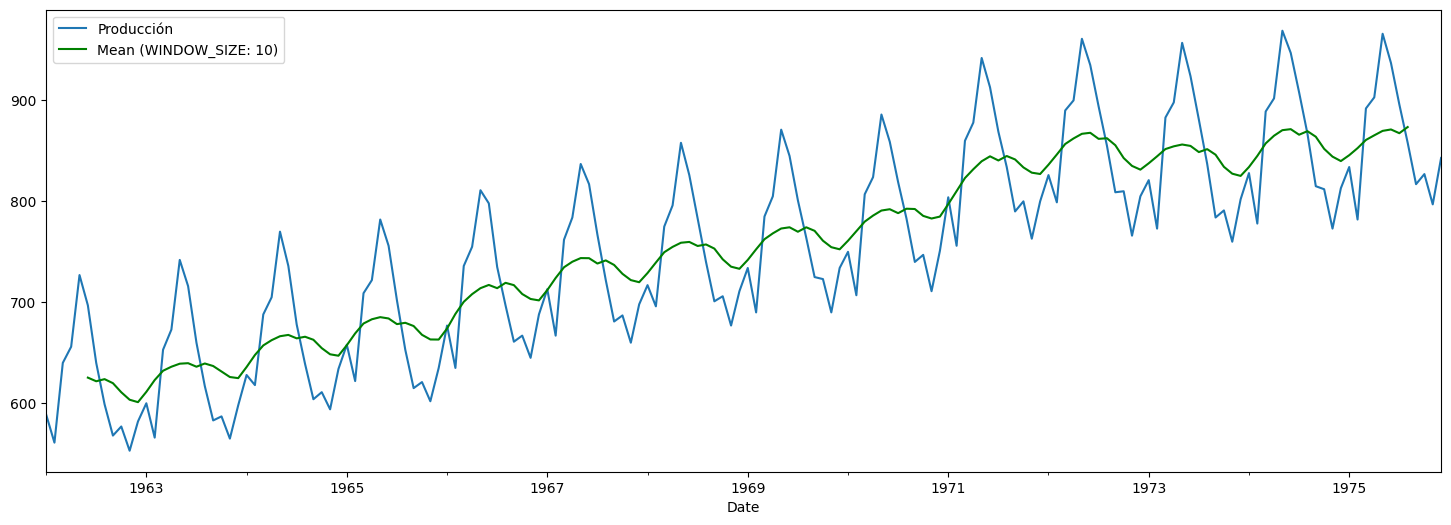

In [100]:
WINDOW_SIZE = 10

r = dt.rolling(window = WINDOW_SIZE, center=True)

figure(figsize=(18, 6))
dt['Production'].plot(label='Producción')
r.mean()['Production'].plot(label='Mean (WINDOW_SIZE: '+str(WINDOW_SIZE) + ')', color='green');
plt.legend();

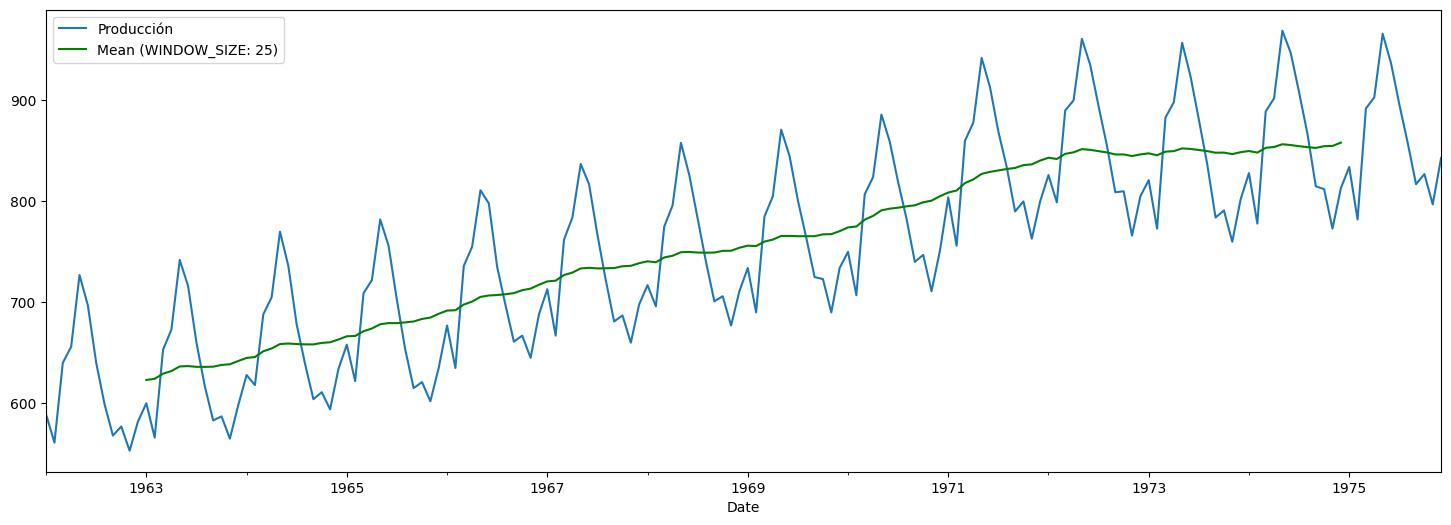

In [101]:
WINDOW_SIZE = 25

r = dt.rolling(window = WINDOW_SIZE, center=True)

figure(figsize=(18, 6))
dt['Production'].plot(label='Producción')
r.mean()['Production'].plot(label='Mean (WINDOW_SIZE: '+str(WINDOW_SIZE) + ')', color='green');
plt.legend();

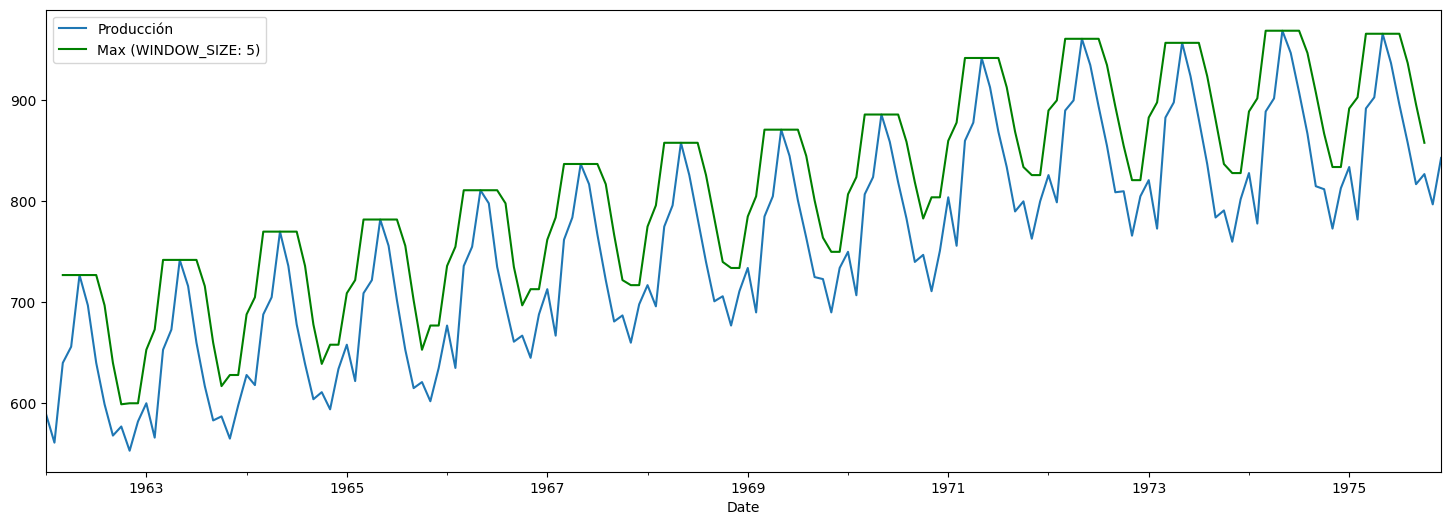

In [102]:
WINDOW_SIZE = 5

r = dt.rolling(window = WINDOW_SIZE, center=True)

figure(figsize=(18, 6))
dt['Production'].plot(label='Producción')
r.max()['Production'].plot(label='Max (WINDOW_SIZE: '+str(WINDOW_SIZE) + ')', color='green');
plt.legend();

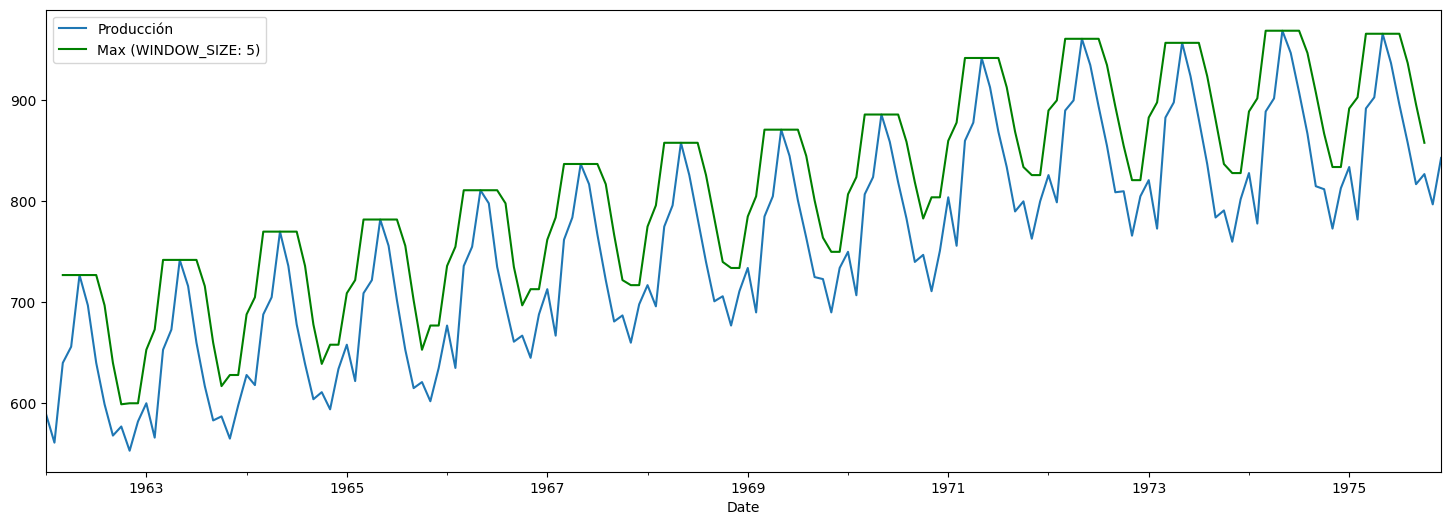

In [103]:
WINDOW_SIZE = 5

r = dt.rolling(window = WINDOW_SIZE, center=True)

figure(figsize=(18, 6))
dt['Production'].plot(label='Producción')
r.max()['Production'].plot(label='Max (WINDOW_SIZE: '+str(WINDOW_SIZE) + ')', color='green');
plt.legend();

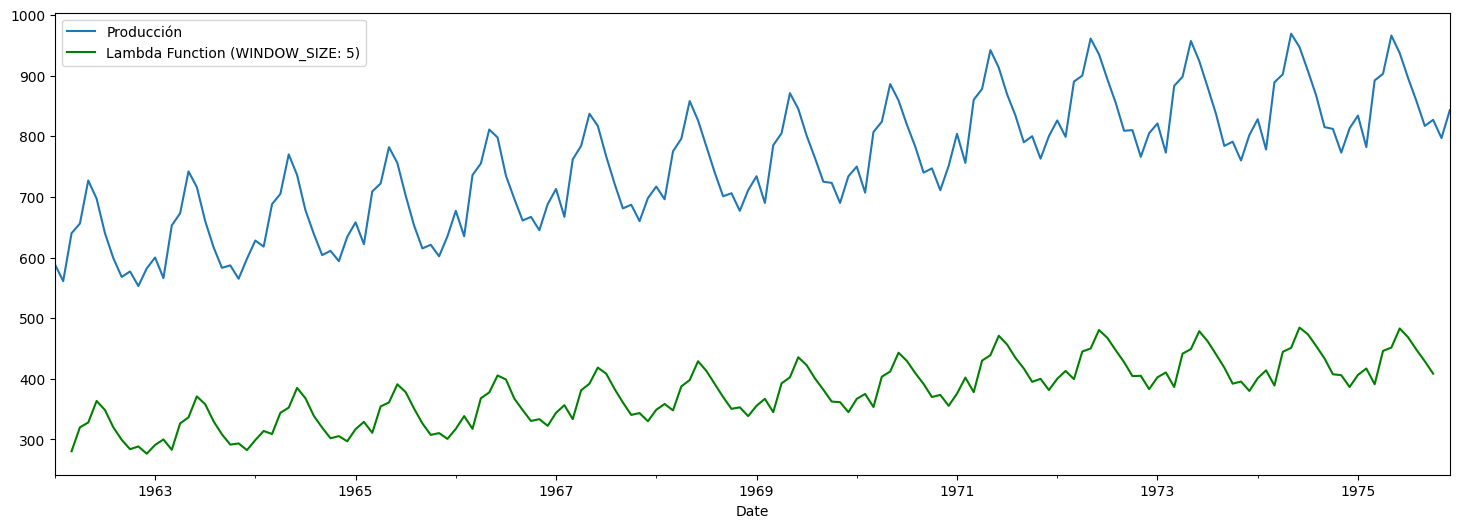

In [105]:
WINDOW_SIZE = 5

r = dt.rolling(window = WINDOW_SIZE, center=True)

figure(figsize=(18, 6))
dt['Production'].plot(label='Producción')
r['Production'].apply(lambda x: x[1]/2).plot(label='Lambda Function (WINDOW_SIZE: '+str(WINDOW_SIZE) + ')', color='green');
plt.legend();